In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data

In [5]:
path = r'/content/drive/MyDrive/Colab Notebooks/data/Crop_recommendation.csv'
crop_df = pd.read_csv(path)
crop_df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [6]:
# Read the columns
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
# Find out the total number of data in (row, col) format
crop_df.shape

(2200, 8)

In [12]:
# Defines the type of the columns
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [26]:
# Check for null values
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [27]:
# Check for duplicate values
crop_df.duplicated().sum()

0

In [13]:
# All the statistical description of the individual numerical columns
crop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [28]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Exploring dataset

In [29]:
# Choose only numeric columns from a dataset to get the corr
corr = crop_df.select_dtypes(exclude=[object]).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

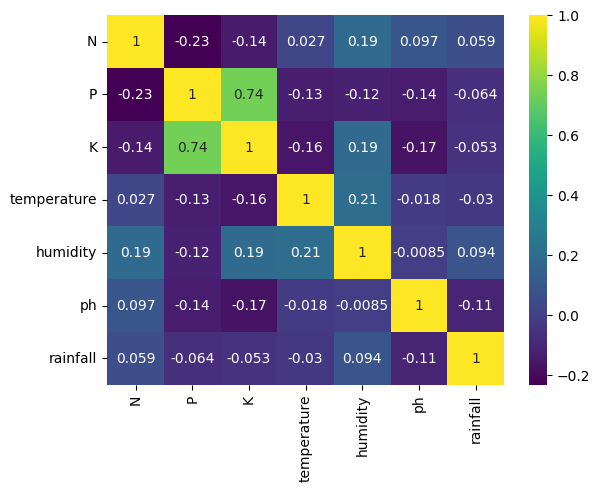

In [30]:
# Plot the correlation among the numerical dataset
sns.heatmap(corr,annot=True,cbar=True,cmap='viridis')

<ipython-input-33-d192ed1a8af2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_df['N'])


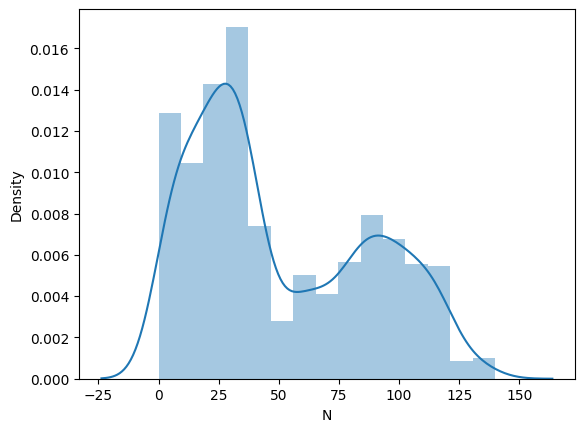

In [33]:
# Plot a distibution plot on Nitrogen 'N' column
sns.distplot(crop_df['N'])
plt.show()

# Encoding

In [34]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop_df['crop_num']=crop_df['label'].map(crop_dict)

In [35]:
crop_df['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [36]:
crop_df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [37]:
crop_df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


# Train Split Data

In [38]:
X = crop_df.drop(['crop_num','label'], axis=1)
y = crop_df['crop_num']

In [39]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [40]:
y.shape

(2200,)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=40)

In [42]:
X_train.shape

(1540, 7)

In [43]:
X_test.shape

(660, 7)

In [44]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1347,84,7,51,26.815305,87.656945,6.399669,55.740736
1790,51,57,55,24.705284,90.147322,6.676407,108.410316
286,30,75,81,19.417897,16.804722,6.408438,68.495119
1223,25,121,201,30.507348,82.717756,5.594241,70.082004
1439,108,22,47,28.535457,91.727427,6.161124,25.129005


# Scale the features using Min Max Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [46]:
X_train

array([[0.6       , 0.01428571, 0.23      , ..., 0.85622515, 0.44971296,
        0.12771629],
       [0.36428571, 0.37142857, 0.25      , ..., 0.88527632, 0.49278717,
        0.31704542],
       [0.21428571, 0.5       , 0.38      , ..., 0.02970799, 0.45107782,
        0.17356393],
       ...,
       [0.00714286, 0.05      , 0.125     , ..., 0.95292514, 0.31936493,
        0.39857115],
       [0.84285714, 0.07142857, 0.2       , ..., 0.81596593, 0.47124511,
        0.09993191],
       [0.47857143, 0.25714286, 0.175     , ..., 0.85808779, 0.59500786,
        0.4759621 ]])

# Standarization

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train

array([[ 0.91681403, -1.43223132,  0.05739773, ...,  0.74031401,
        -0.10795332, -0.87072076],
       [ 0.01666741,  0.09327374,  0.13667352, ...,  0.85117605,
         0.24960264,  0.06405961],
       [-0.55615316,  0.64245556,  0.65196615, ..., -2.4137554 ,
        -0.09662365, -0.64435581],
       ...,
       [-1.3471911 , -1.27968081, -0.35880016, ...,  1.1093305 ,
        -1.18996302,  0.46657907],
       [ 1.84423782, -1.18815051, -0.06151595, ...,  0.58668093,
         0.07078353, -1.00790138],
       [ 0.45310214, -0.39488788, -0.16061069, ...,  0.747422  ,
         1.09812929,  0.84868372]])

# Training Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9651515151515152
Naive Bayes  with accuracy : 0.9939393939393939
Support Vector Machine  with accuracy : 0.9803030303030303
K-Nearest Neighbors  with accuracy : 0.9727272727272728
Decision Tree  with accuracy : 0.9848484848484849
Random Forest  with accuracy : 0.9954545454545455
Bagging  with accuracy : 0.9924242424242424
AdaBoost  with accuracy : 0.17575757575757575
Gradient Boosting  with accuracy : 0.9893939393939394
Extra Trees  with accuracy : 0.8818181818181818


In [50]:
# Choosing Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.996969696969697

# Predictive System

In [51]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [52]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Papaya is a best crop to be cultivated 


# Save the Models

In [55]:
path = '/content/drive/MyDrive/Colab Notebooks/data/'

In [60]:
rfc_file = path + "model.pkl"

In [58]:
import pickle

In [59]:
with open(rfc_file,'wb') as f:
  pickle.dump(rfc,f)

In [61]:
ms_file = path + "minmaxscaler.pkl"
sc_file = path + "standardscaler.pkl"

In [62]:
with open(ms_file,'wb') as f:
  pickle.dump(ms,f)

In [63]:
with open(sc_file,'wb') as f:
  pickle.dump(sc,f)